Radar graphs are used to plot average prefict probability of Saved and Unsaved group by gender

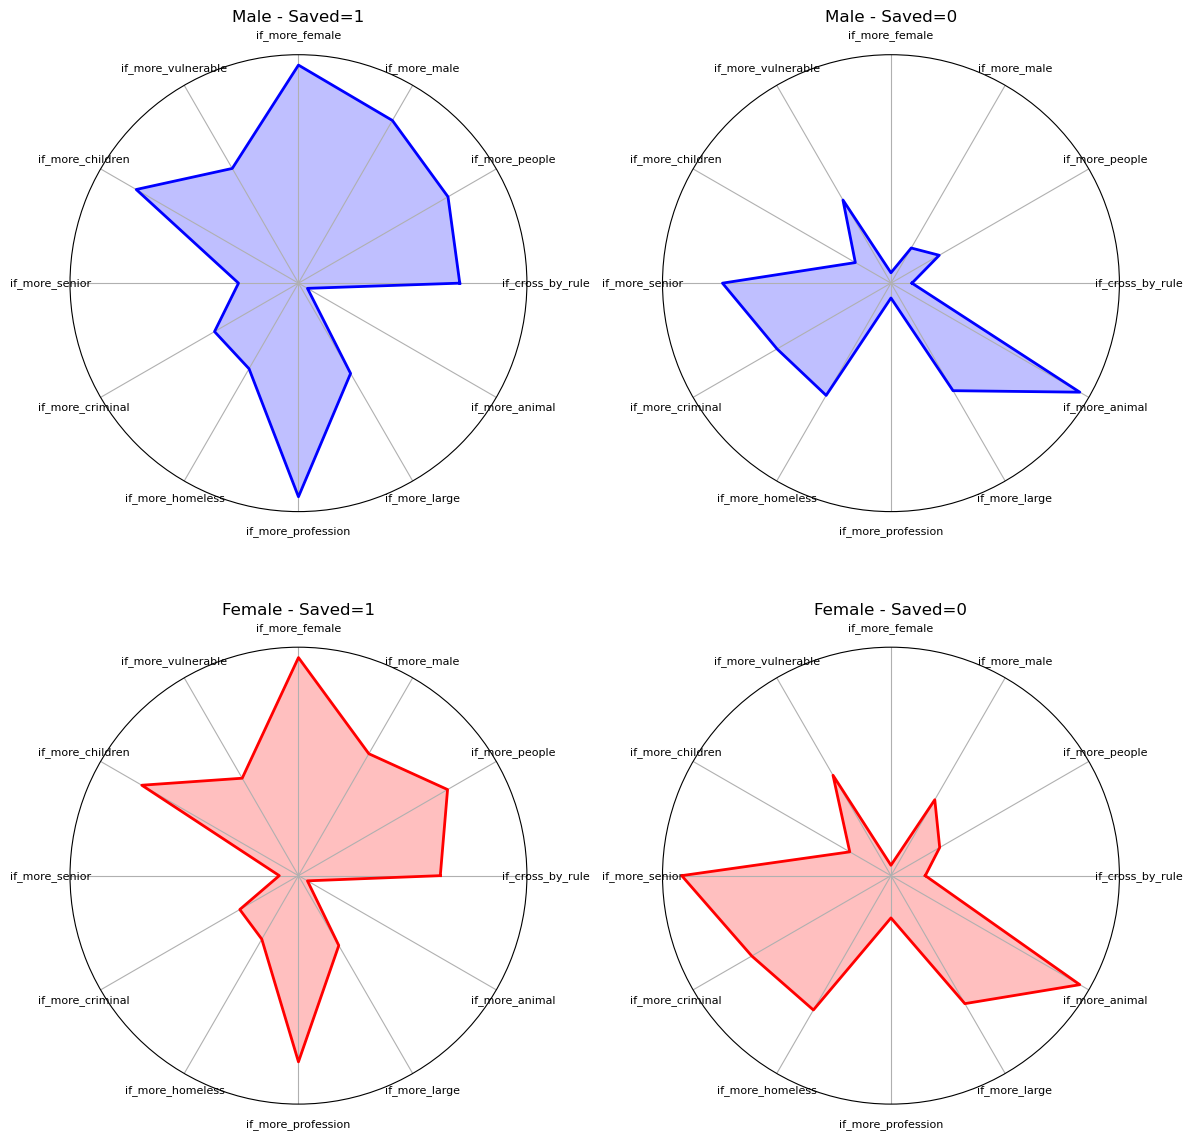

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('add_dilemmaid_1226.csv') 

features = ['if_cross_by_rule', 'if_more_people', 'if_more_male', 'if_more_female',
            'if_more_vulnerable', 'if_more_children', 'if_more_senior',
            'if_more_criminal', 'if_more_homeless', 'if_more_profession',
            'if_more_large', 'if_more_animal']
group_cols = ['Review_gender', 'Saved']  

grouped_means = data.groupby(group_cols)[features].mean()

def plot_radar_chart(ax, data, labels, title, color):
    num_vars = len(data)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    data = np.concatenate((data, [data[0]]))  
    angles += angles[:1]

    ax.fill(angles, data, color=color, alpha=0.25)
    ax.plot(angles, data, color=color, linewidth=2)

    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8)
    ax.set_title(title, size=12, position=(0.5, 1.2), ha='center')

fig, axes = plt.subplots(2, 2, figsize=(12, 12), subplot_kw=dict(polar=True))

groups = [('male', 1), ('male', 0), ('female', 1), ('female', 0)]
titles = ["Male - Saved=1", "Male - Saved=0", "Female - Saved=1", "Female - Saved=0"]
colors = ['blue', 'blue', 'red', 'red']

for ax, (group, title, color) in zip(axes.flat, zip(groups, titles, colors)):
    gender, saved = group
    if (gender, saved) in grouped_means.index:
        plot_radar_chart(
            ax,
            grouped_means.loc[(gender, saved)].values,
            features,
            title,
            color
        )
    else:
        ax.set_visible(False) 

plt.tight_layout()
plt.show()


Feature importance - if each feature has the same impact to result group by gender


Feature Importances for Male:
Feature: if_cross_by_rule, Importance: 0.2048
Feature: if_more_people, Importance: 0.1106
Feature: if_more_male, Importance: 0.0741
Feature: if_more_female, Importance: 0.1193
Feature: if_more_vulnerable, Importance: 0.0425
Feature: if_more_children, Importance: 0.1573
Feature: if_more_senior, Importance: 0.0501
Feature: if_more_criminal, Importance: 0.0104
Feature: if_more_homeless, Importance: 0.0137
Feature: if_more_profession, Importance: 0.1227
Feature: if_more_large, Importance: 0.0192
Feature: if_more_animal, Importance: 0.0753

Feature Importances for Female:
Feature: if_cross_by_rule, Importance: 0.1894
Feature: if_more_people, Importance: 0.1513
Feature: if_more_male, Importance: 0.0487
Feature: if_more_female, Importance: 0.1407
Feature: if_more_vulnerable, Importance: 0.0522
Feature: if_more_children, Importance: 0.1817
Feature: if_more_senior, Importance: 0.0604
Feature: if_more_criminal, Importance: 0.0154
Feature: if_more_homeless, Importan

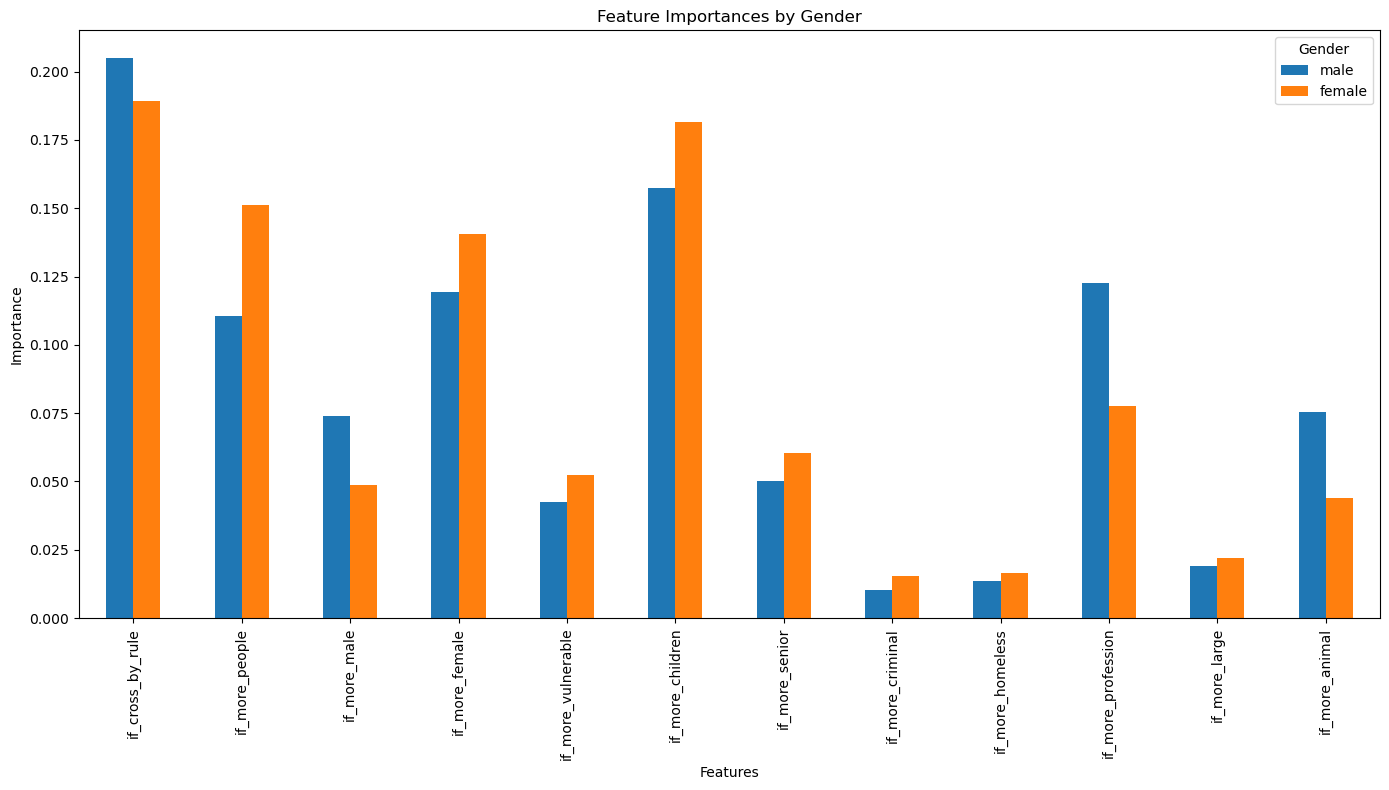

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

data = pd.read_csv("add_dilemmaid_1226.csv") 

features = ['if_cross_by_rule', 'if_more_people', 'if_more_male', 'if_more_female',
            'if_more_vulnerable', 'if_more_children', 'if_more_senior',
            'if_more_criminal', 'if_more_homeless', 'if_more_profession',
            'if_more_large', 'if_more_animal']
target = "Saved"

group_importances = {}

for gender in ["male", "female"]:
    gender_data = data[data["Review_gender"] == gender]
    X = gender_data[features]
    y = gender_data[target]
    
    # Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)
    
    importances = rf.feature_importances_
    group_importances[gender] = importances

    print(f"\nFeature Importances for {gender.capitalize()}:")
    for feature, importance in zip(features, importances):
        print(f"Feature: {feature}, Importance: {importance:.4f}")

# plot by gender
def plot_feature_importances(group_importances, features):
    importance_df = pd.DataFrame(group_importances, index=features)
    importance_df.plot(kind="bar", figsize=(14, 8))
    plt.title("Feature Importances by Gender")
    plt.ylabel("Importance")
    plt.xlabel("Features")
    plt.legend(title="Gender")
    plt.tight_layout()
    plt.show()

plot_feature_importances(group_importances, features)


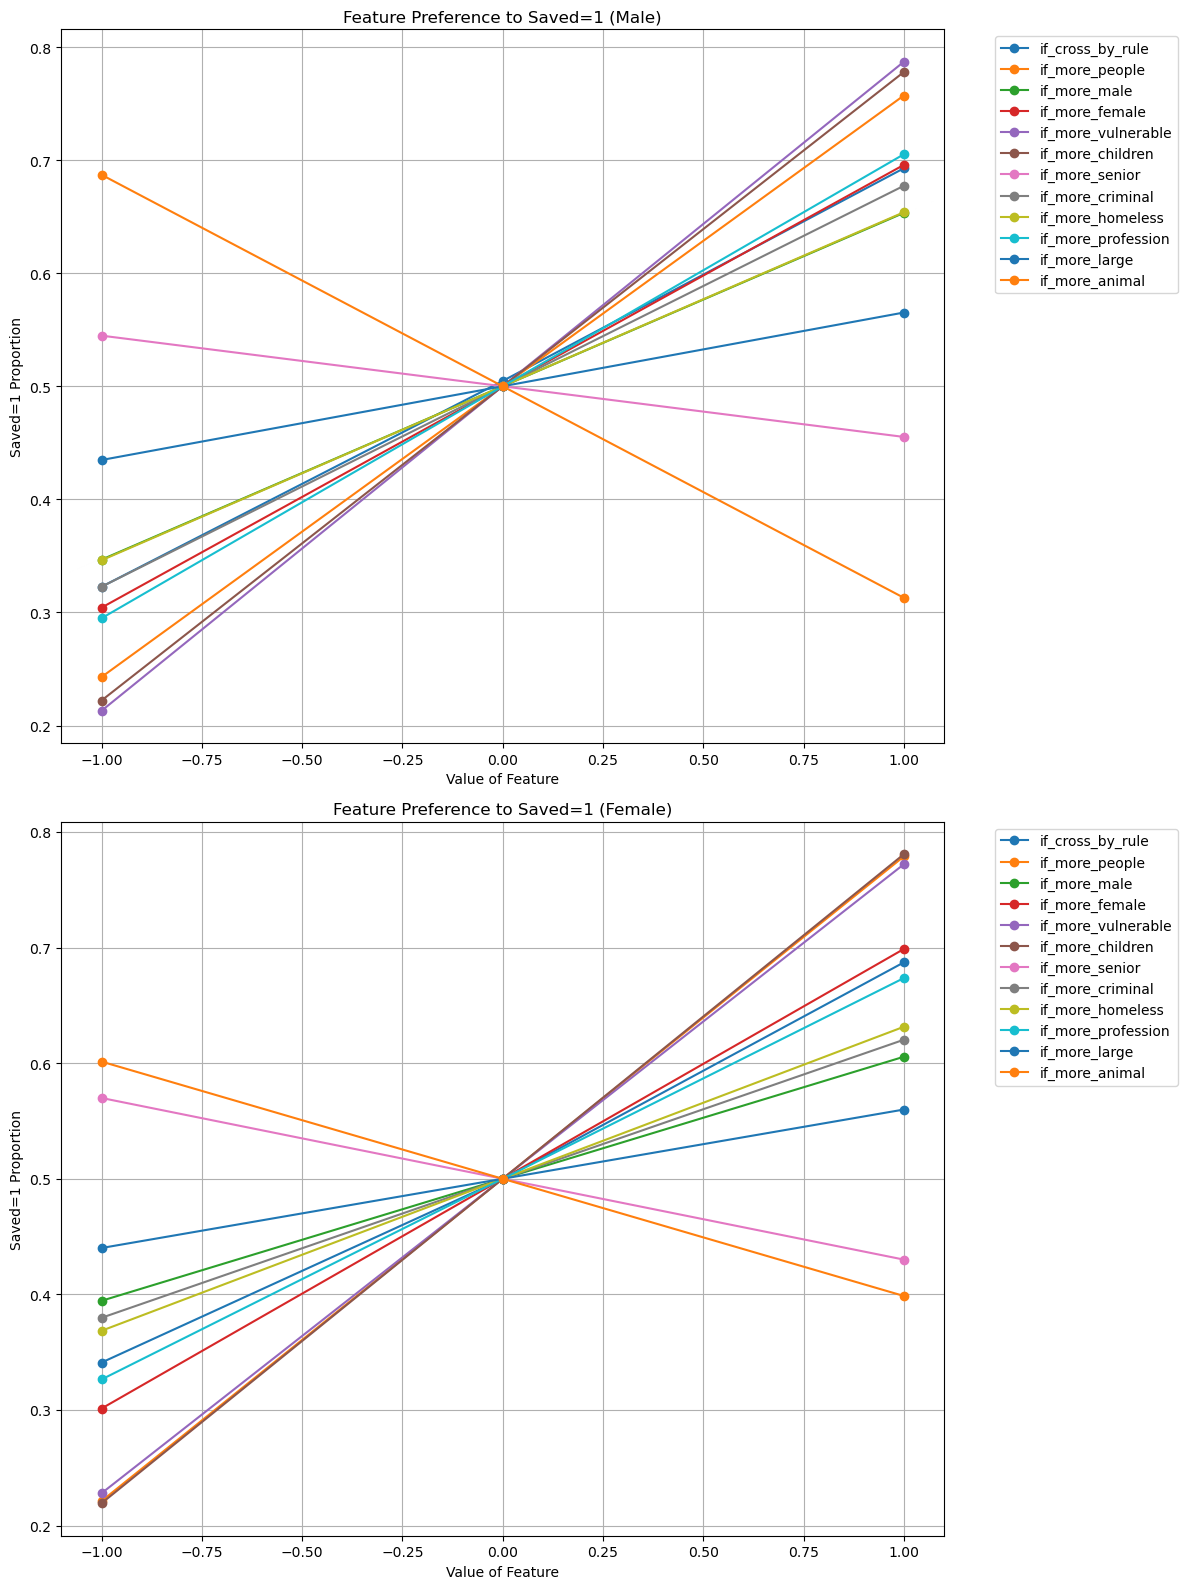

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("add_dilemmaid_1226.csv")  

features = ['if_cross_by_rule', 'if_more_people', 'if_more_male', 'if_more_female',
            'if_more_vulnerable', 'if_more_children', 'if_more_senior',
            'if_more_criminal', 'if_more_homeless', 'if_more_profession',
            'if_more_large', 'if_more_animal']

gender_results = {"male": {}, "female": {}}

for gender in ["male", "female"]:
    gender_data = data[data["Review_gender"] == gender]  
    for feature in features:
        group = gender_data.groupby(feature)["Saved"].mean()  
        gender_results[gender][feature] = group

fig, axes = plt.subplots(2, 1, figsize=(12, 16))  

for ax, (gender, results) in zip(axes, gender_results.items()):
    for feature, group in results.items():
        ax.plot(group.index, group.values, marker='o', label=feature)
    
    ax.set_title(f"Feature Preference to Saved=1 ({gender.capitalize()})")
    ax.set_xlabel("Value of Feature")
    ax.set_ylabel("Saved=1 Proportion")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
    ax.grid()

plt.tight_layout()  
plt.show()


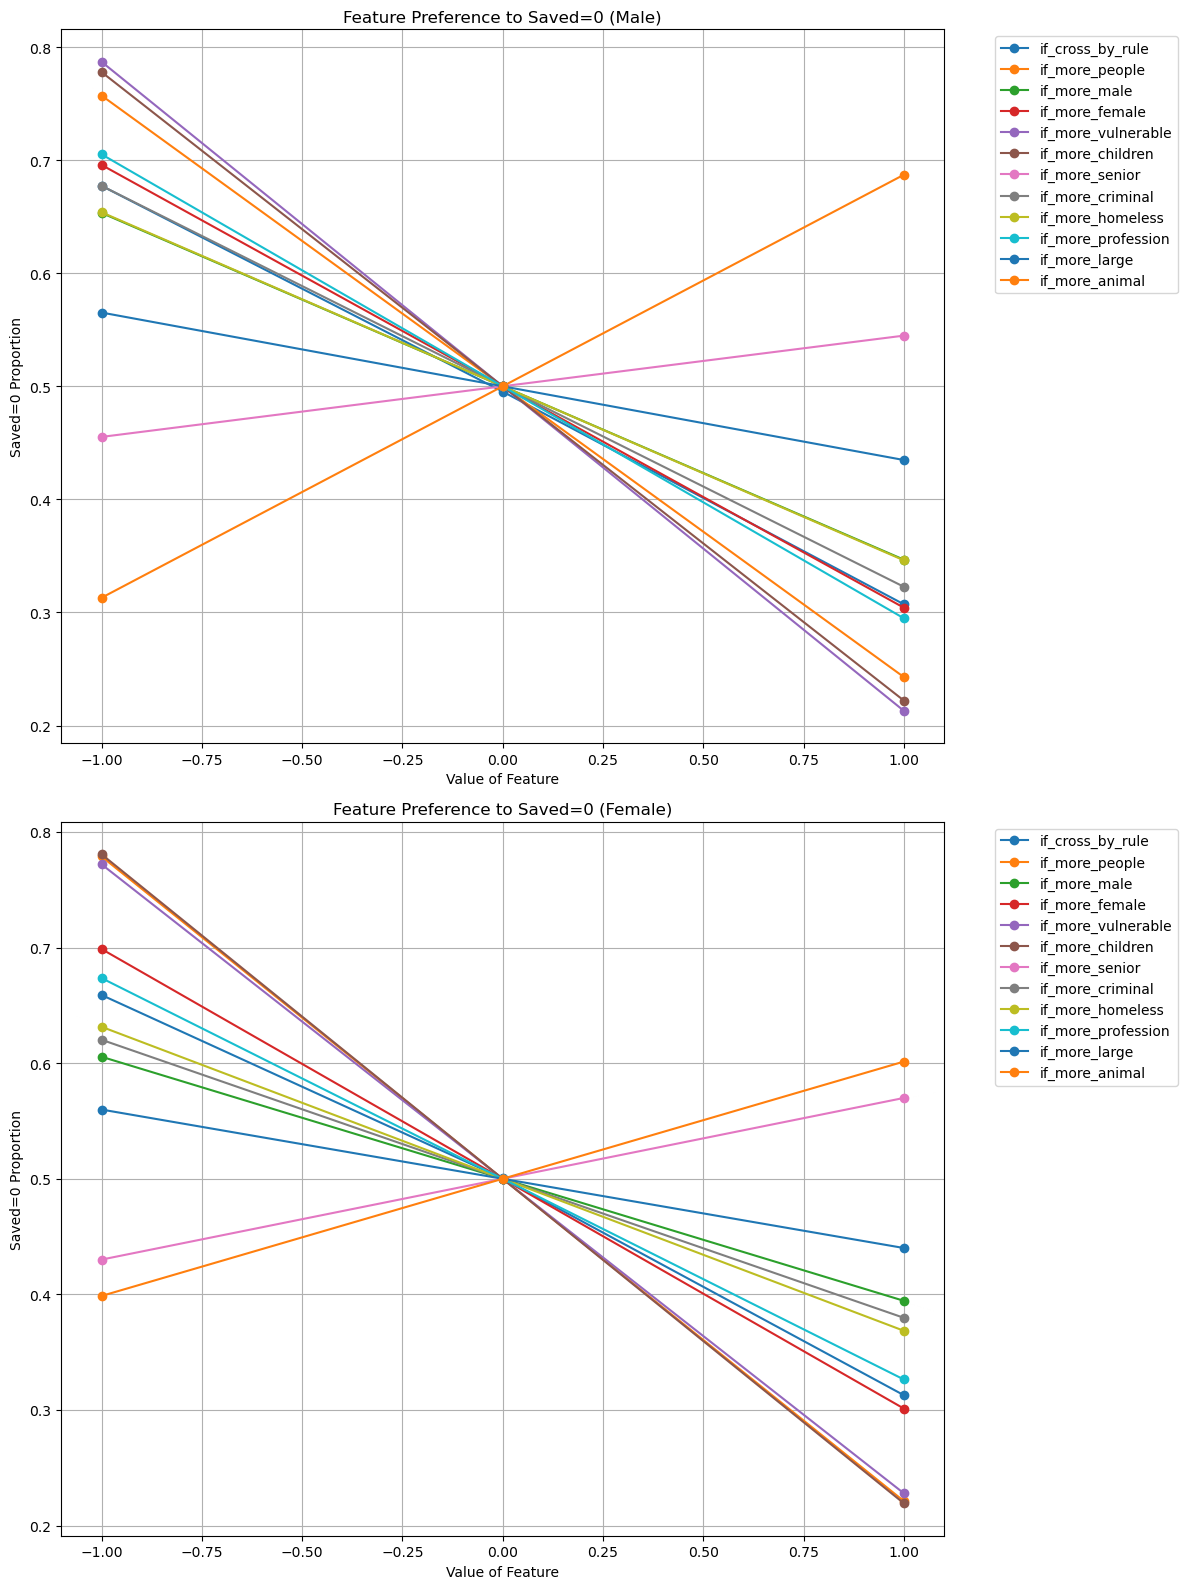

In [4]:
gender_results = {"male": {}, "female": {}}

for gender in ["male", "female"]:
    gender_data = data[data["Review_gender"] == gender]  
    for feature in features:
        group = gender_data.groupby(feature)["Saved"].apply(lambda x: 1 - x.mean())  
        gender_results[gender][feature] = group

fig, axes = plt.subplots(2, 1, figsize=(12, 16))  

for ax, (gender, results) in zip(axes, gender_results.items()):
    for feature, group in results.items():
        ax.plot(group.index, group.values, marker='o', label=feature)
    
    ax.set_title(f"Feature Preference to Saved=0 ({gender.capitalize()})")
    ax.set_xlabel("Value of Feature")
    ax.set_ylabel("Saved=0 Proportion")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
    ax.grid()

plt.tight_layout() 
plt.show()

KL Divergence calculation and High-divergence dilemma scenaior analysis

In [12]:
import pandas as pd
df2 = pd.read_csv('add_dilemmaid_1226.csv')
df2_selected = df2[['ResponseID','Review_gender','DilemmaID','Saved']]

import pandas as pd
import numpy as np

# KL divergence
def kl_divergence(p, q):
    epsilon = 1e-10  
    p = np.array(p) + epsilon
    q = np.array(q) + epsilon
    return np.sum(p * np.log(p / q))
df=df2
results = []

for dilemma_id, group in df.groupby('DilemmaID'):
    male_count = group[group['Review_gender'] == 'male'].shape[0]
    female_count = group[group['Review_gender'] == 'female'].shape[0]
    
    if male_count == 0 or female_count == 0:
        continue
    
    male_group = group[group['Review_gender'] == 'male']['Saved'].value_counts(normalize=True)
    female_group = group[group['Review_gender'] == 'female']['Saved'].value_counts(normalize=True)
    
    all_saved_options = set(male_group.index).union(set(female_group.index))
    male_distribution = [male_group.get(option, 0) for option in all_saved_options]
    female_distribution = [female_group.get(option, 0) for option in all_saved_options]
    
    kl_value = kl_divergence(male_distribution, female_distribution)
    
    results.append({'DilemmaID': dilemma_id, 'KL_Divergence': kl_value})

kl_results_df = pd.DataFrame(results)
print(kl_results_df)


       DilemmaID  KL_Divergence
0              5       0.000000
1              6       0.000000
2             18       0.000000
3             19       0.000000
4             24       0.000000
...          ...            ...
69963     303138      23.025851
69964     303139       0.000000
69965     303147       0.000000
69966     303152       0.000000
69967     303162       0.000000

[69968 rows x 2 columns]


In [13]:
print(kl_results_df['KL_Divergence'].describe())

count    69968.000000
mean         5.416006
std          8.254854
min          0.000000
25%          0.000000
50%          0.114890
75%         10.819778
max         23.025851
Name: KL_Divergence, dtype: float64


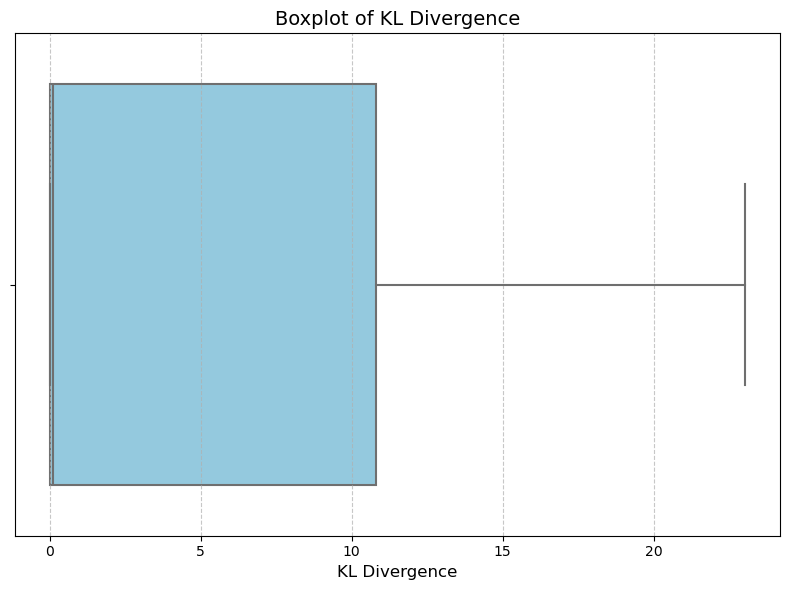

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=kl_results_df['KL_Divergence'], color='skyblue')

plt.title('Boxplot of KL Divergence', fontsize=14)
plt.xlabel('KL Divergence', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

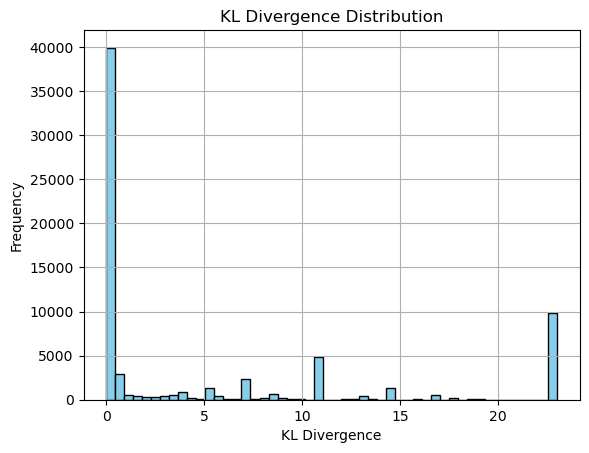

In [7]:
import matplotlib.pyplot as plt

kl_results_df['KL_Divergence'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('KL Divergence Distribution')
plt.xlabel('KL Divergence')
plt.ylabel('Frequency')
plt.show()


In [8]:
high_divergence = kl_results_df[kl_results_df['KL_Divergence']>5.41]
filtered_df = df[df['DilemmaID'].isin(high_divergence['DilemmaID'])]

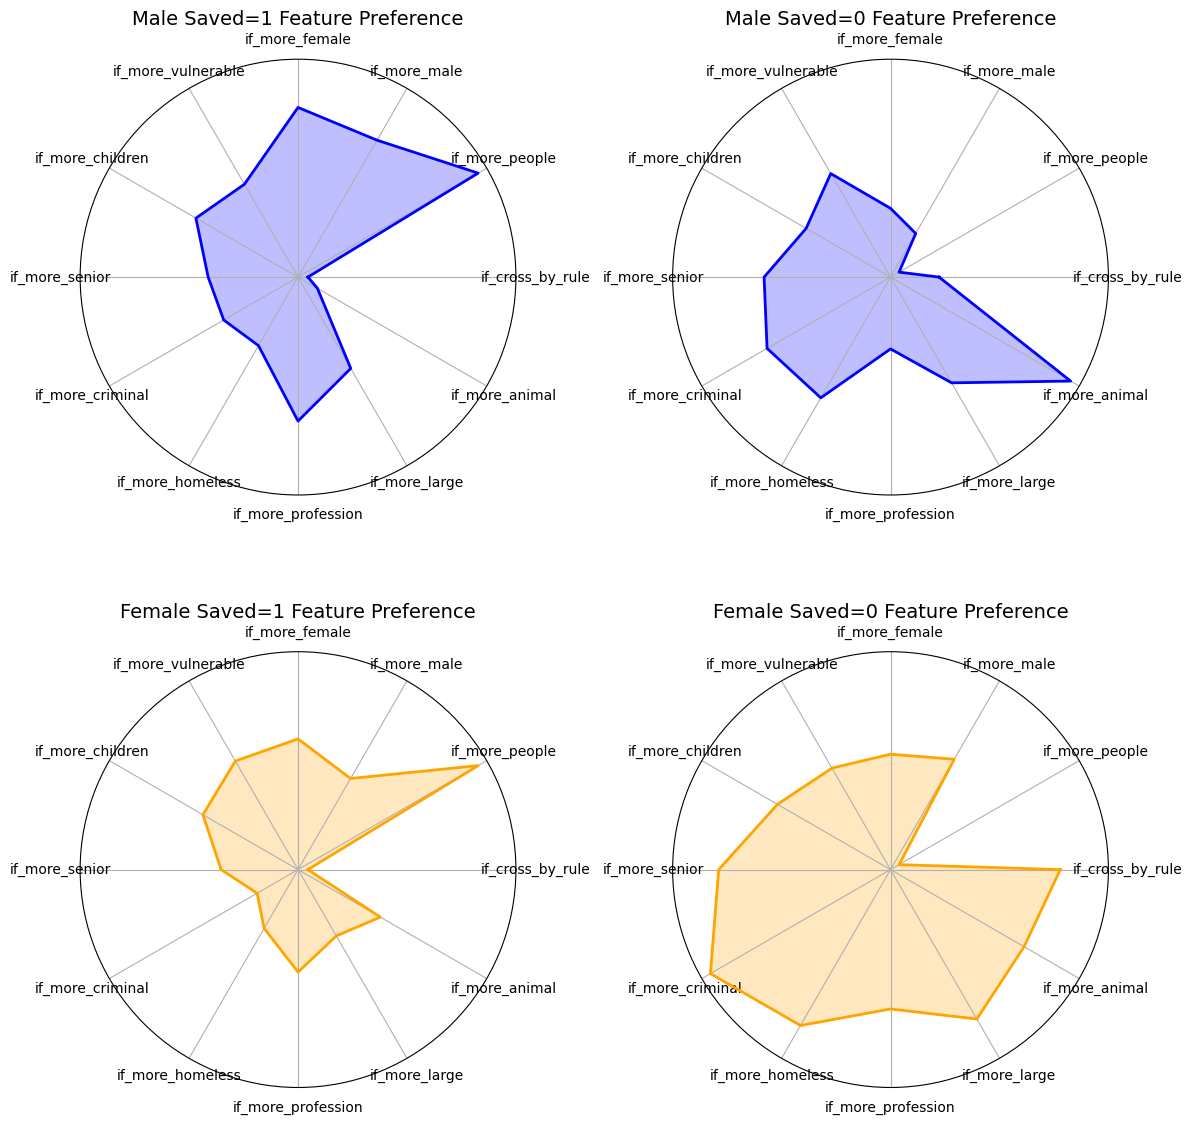

In [9]:
features = ['if_cross_by_rule', 'if_more_people', 'if_more_male', 'if_more_female',
            'if_more_vulnerable', 'if_more_children', 'if_more_senior',
            'if_more_criminal', 'if_more_homeless', 'if_more_profession',
            'if_more_large', 'if_more_animal']
target = 'Saved'


def plot_radar_chart(ax, data, labels, title, color):
    num_vars = len(data)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    data = np.concatenate((data, [data[0]])) 
    angles += angles[:1]

    ax.fill(angles, data, color=color, alpha=0.25)
    ax.plot(angles, data, color=color, linewidth=2)

    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_title(title, size=14, position=(0.5, 1.1), ha='center')

fig, axes = plt.subplots(2, 2, figsize=(12, 12), subplot_kw=dict(polar=True))

df = filtered_df
male_data = df[df['Review_gender'] == 'male']
male_grouped = male_data.groupby(target)[features].mean()

female_data = df[df['Review_gender'] == 'female']
female_grouped = female_data.groupby(target)[features].mean()

plot_radar_chart(
    axes[0, 0], male_grouped.loc[1].values, features,
    "Male Saved=1 Feature Preference", "blue"
)
plot_radar_chart(
    axes[0, 1], male_grouped.loc[0].values, features,
    "Male Saved=0 Feature Preference", "blue"
)
plot_radar_chart(
    axes[1, 0], female_grouped.loc[1].values, features,
    "Female Saved=1 Feature Preference", "orange"
)
plot_radar_chart(
    axes[1, 1], female_grouped.loc[0].values, features,
    "Female Saved=0 Feature Preference", "orange"
)

plt.tight_layout()
plt.show()

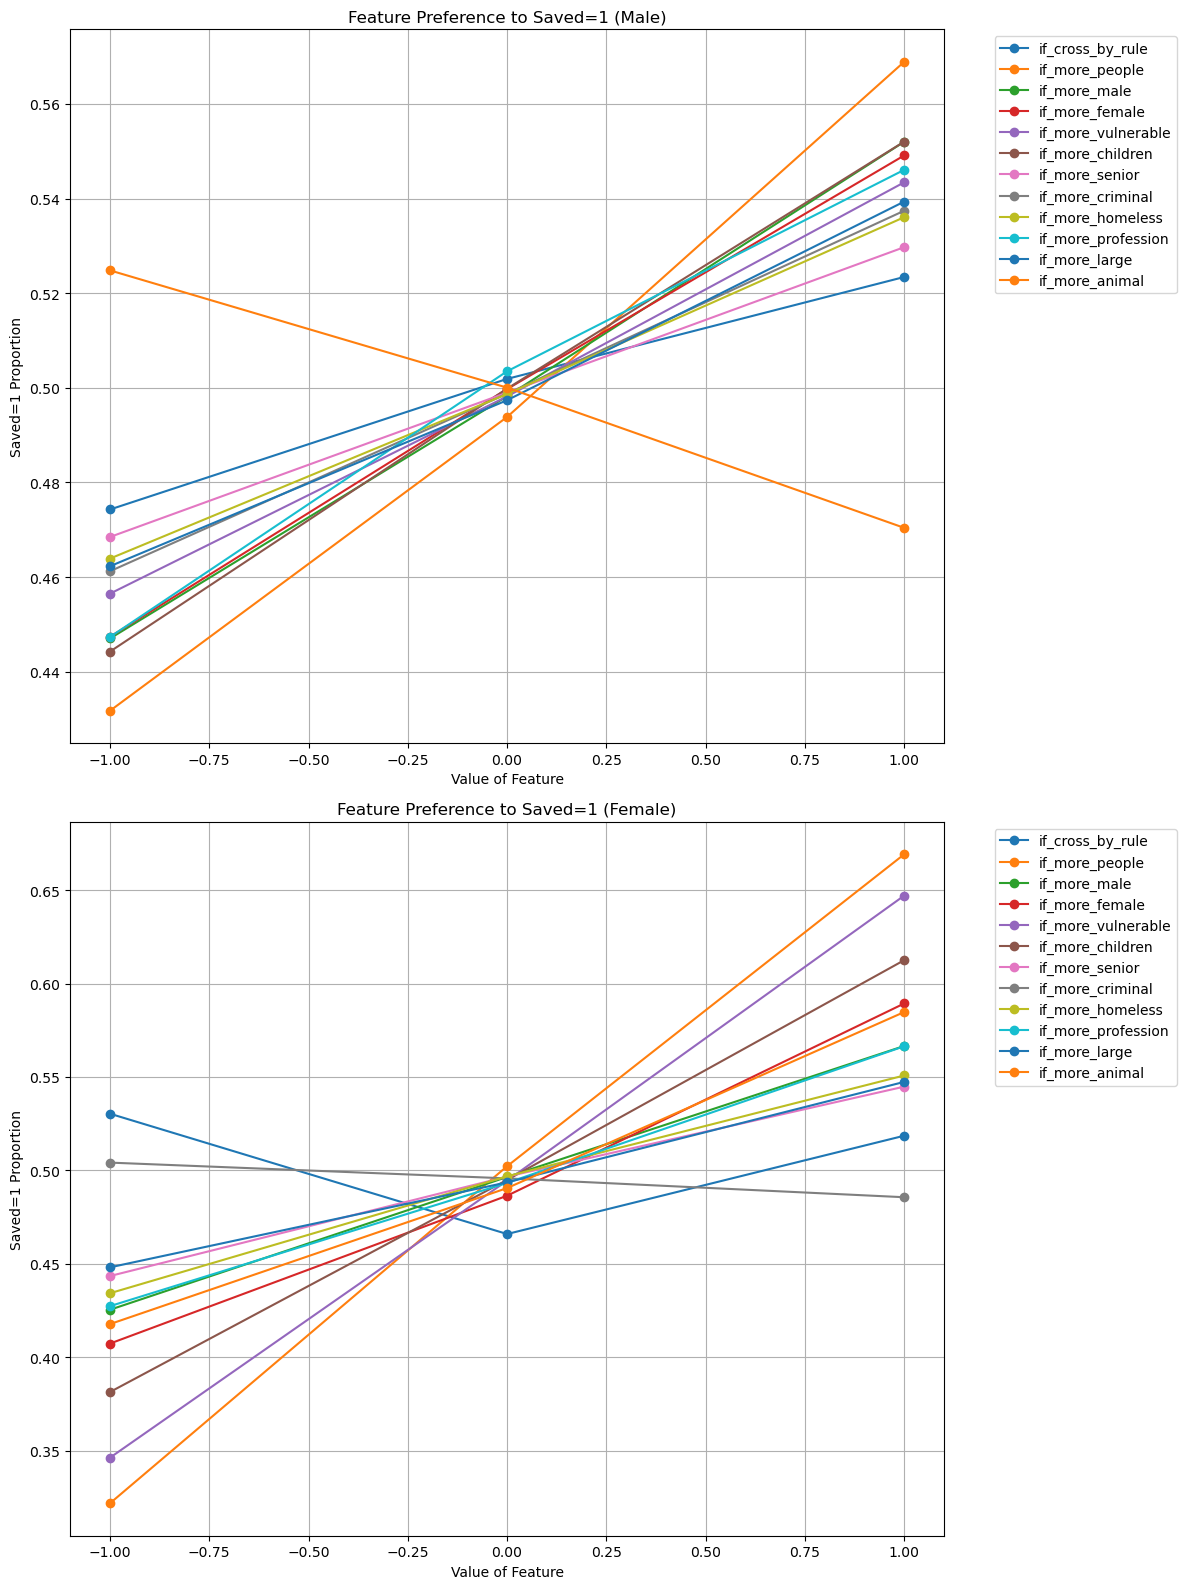

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = df

features = ['if_cross_by_rule', 'if_more_people', 'if_more_male', 'if_more_female',
            'if_more_vulnerable', 'if_more_children', 'if_more_senior',
            'if_more_criminal', 'if_more_homeless', 'if_more_profession',
            'if_more_large', 'if_more_animal']

gender_results = {"male": {}, "female": {}}

for gender in ["male", "female"]:
    gender_data = data[data["Review_gender"] == gender]  
    for feature in features:
        group = gender_data.groupby(feature)["Saved"].mean()  
        gender_results[gender][feature] = group

fig, axes = plt.subplots(2, 1, figsize=(12, 16))  

for ax, (gender, results) in zip(axes, gender_results.items()):
    for feature, group in results.items():
        ax.plot(group.index, group.values, marker='o', label=feature)
    
    ax.set_title(f"Feature Preference to Saved=1 ({gender.capitalize()})")
    ax.set_xlabel("Value of Feature")
    ax.set_ylabel("Saved=1 Proportion")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
    ax.grid()

plt.tight_layout()  
plt.show()


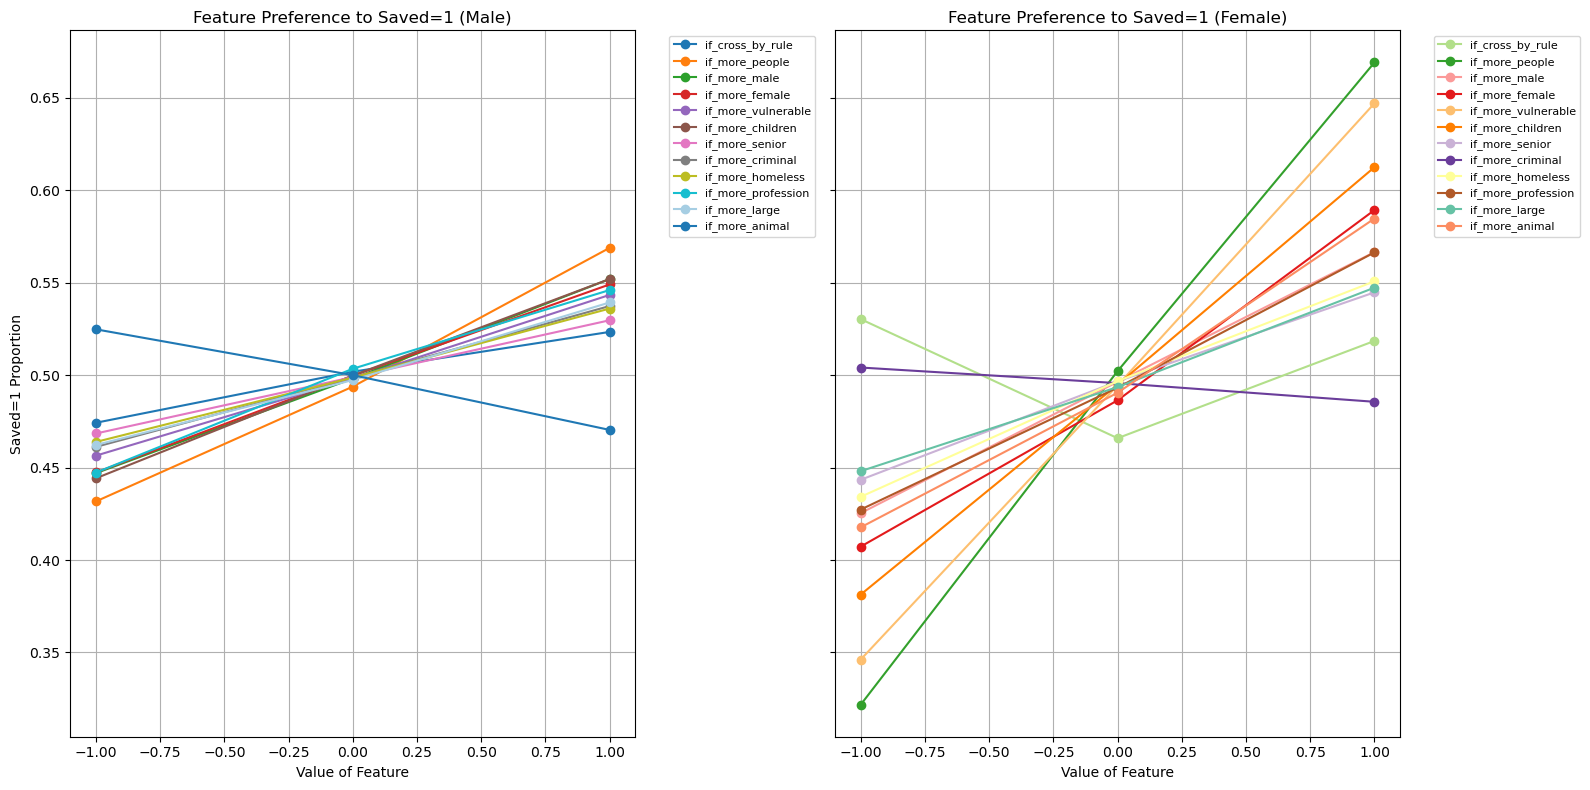

In [17]:
# change layout to 1*2
import matplotlib.pyplot as plt
import itertools

colors = itertools.cycle(
    plt.cm.tab10.colors + 
    plt.cm.Paired.colors + 
    plt.cm.Set2.colors + 
    plt.cm.Accent.colors
)  

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True) 

for ax, (gender, results) in zip(axes, gender_results.items()):
    feature_colors = {feature: next(colors) for feature in results.keys()}  
    for feature, group in results.items():
        ax.plot(group.index, group.values, marker='o', label=feature, color=feature_colors[feature])
    
    ax.set_title(f"Feature Preference to Saved=1 ({gender.capitalize()})")
    ax.set_xlabel("Value of Feature")
    if gender == "male":
        ax.set_ylabel("Saved=1 Proportion") 
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8) 
    ax.grid()

plt.tight_layout()
plt.show()
